<a href="https://colab.research.google.com/github/ElaBoudaya/GDP-analysis-France/blob/main/GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP : Régressions linéaire, polynomiale et exponentielle







1.  **Import and preview**




*   Import Python Packages:






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


*  read data:


In [ ]:
url=" https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"
df=pd.read_csv(url)
print(df)

      Country Name Country Code  Year         Value
0      Afghanistan          AFG  2000  3.521418e+09
1      Afghanistan          AFG  2001  2.813572e+09
2      Afghanistan          AFG  2002  3.825701e+09
3      Afghanistan          AFG  2003  4.520947e+09
4      Afghanistan          AFG  2004  5.224897e+09
...            ...          ...   ...           ...
13974     Zimbabwe          ZWE  2019  2.183223e+10
13975     Zimbabwe          ZWE  2020  2.150970e+10
13976     Zimbabwe          ZWE  2021  2.837124e+10
13977     Zimbabwe          ZWE  2022  2.736663e+10
13978     Zimbabwe          ZWE  2023  2.653827e+10

[13979 rows x 4 columns]


*   Read France data



In [ ]:
France_df=df[df["Country Name"] == "France"][["Year","Value"]]
print(France_df)


      Year         Value
4281  1960  6.222548e+10
4282  1961  6.746164e+10
4283  1962  7.560753e+10
4284  1963  8.475920e+10
4285  1964  9.400785e+10
...    ...           ...
4340  2019  2.728870e+12
4341  2020  2.647419e+12
4342  2021  2.959356e+12
4343  2022  2.779092e+12
4344  2023  3.030904e+12

[64 rows x 2 columns]


*   show the first 5 rows:



In [ ]:
print(France_df.head())

      Year         Value
4281  1960  6.222548e+10
4282  1961  6.746164e+10
4283  1962  7.560753e+10
4284  1963  8.475920e+10
4285  1964  9.400785e+10


2. **Pretreatment**








*   Delete missing values:



In [ ]:
print(France_df.isnull().sum())

Year     0
Value    0
dtype: int64




*  Study the correlation between year and GDP:



In [ ]:
correlation = France_df["Year"].corr(France_df["Value"])
print("Correlation =", correlation)


Correlation = 0.9704470128296452


▶   *a strong positive linear relationship*





*  Drawing a scatter plot:



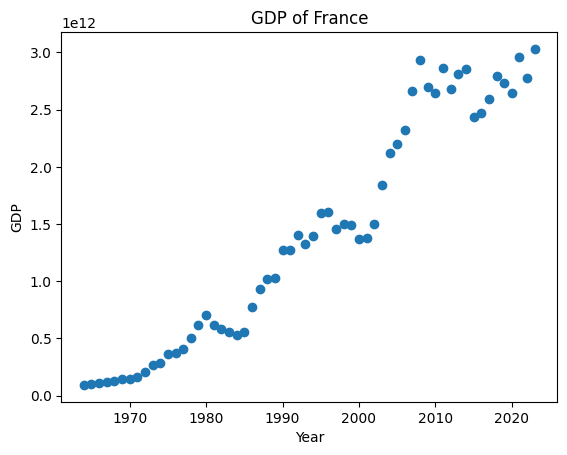

In [ ]:
x = France_df["Year"].values.reshape(-1,1)
y = France_df["Value"].values
plt.scatter(x, y)
plt.title("GDP of France")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()




*  Create a normalized GDP variable (by z-score or min-max).




In [ ]:
scale=StandardScaler()
scaled_y=scale.fit_transform(y.reshape(-1, 1))
print(scaled_y)

[[-1.32584357]
 [-1.31829223]
 [-1.30975882]
 [-1.30080568]
 [-1.2899617 ]
 [-1.27780876]
 [-1.27123637]
 [-1.25367508]
 [-1.21603817]
 [-1.15492484]
 [-1.13373941]
 [-1.05824156]
 [-1.04672123]
 [-1.00865014]
 [-0.91193927]
 [-0.80438288]
 [-0.71679304]
 [-0.80277914]
 [-0.83354302]
 [-0.85862446]
 [-0.88789492]
 [-0.86537484]
 [-0.64640613]
 [-0.4832294 ]
 [-0.39830887]
 [-0.39192556]
 [-0.14724669]
 [-0.1471492 ]
 [-0.01457483]
 [-0.09345437]
 [-0.02207981]
 [ 0.18563584]
 [ 0.19022952]
 [ 0.03699403]
 [ 0.08736423]
 [ 0.07737821]
 [-0.05050551]
 [-0.0384528 ]
 [ 0.08565992]
 [ 0.42979542]
 [ 0.70568558]
 [ 0.78322296]
 [ 0.90717416]
 [ 1.2482203 ]
 [ 1.51871893]
 [ 1.28863386]
 [ 1.23277204]
 [ 1.45338281]
 [ 1.27136804]
 [ 1.39994688]
 [ 1.44416297]
 [ 1.0261724 ]
 [ 1.06004654]
 [ 1.18258937]
 [ 1.37896589]
 [ 1.3166983 ]
 [ 1.23500935]
 [ 1.54785564]
 [ 1.36706667]
 [ 1.61961244]]


Split The Data

In [ ]:

x_train = x[:-20]
x_test = x[-20:]
y_train = y[:-20]
y_test = y[-20:]



3.**Linear regression**





*   Fitting a linear model
 GDP = a*Year + b.




In [206]:

regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
print("a=",regr.coef_)
print("b=",regr.intercept_)


a= [4.57824966e+10]
b= -90016450766509.94




*   Evaluate on test set







In [207]:
y_predreg=regr.predict(x_test)




*   Plot the regression line



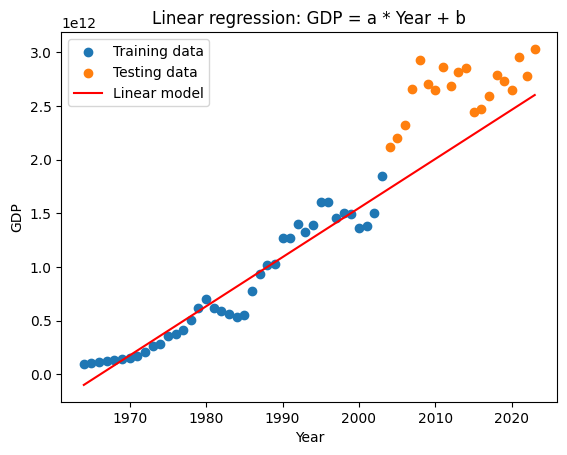

In [208]:
y_predreg_all = regr.predict(x)
plt.scatter(x_train, y_train, label="Training data")
plt.scatter(x_test, y_test, label="Testing data")

plt.plot(x, y_predreg_all, color="red", label="Linear model")

plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Linear regression: GDP = a * Year + b")
plt.legend()
plt.show()



*   calculate the metrics (R², RMSE)


In [209]:
r2_reg=r2_score(y_test,y_predreg)
RMSE_reg= np.sqrt(mean_squared_error(y_test, y_predreg))
print("R² Linear regression =", r2_reg)
print("RMSE Linear regression =", RMSE_reg)

R² Linear regression = -4.185613550260971
RMSE Linear regression = 546533519857.54266



4.  Polynomial regression




In [210]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model=linear_model.LinearRegression()
model.fit(x_train_poly,y_train)
y_pred_poly=model.predict(x_test_poly)

x_poly_full = poly.transform(x)
y_pred_full = model.predict(x_poly_full)




Visualisation

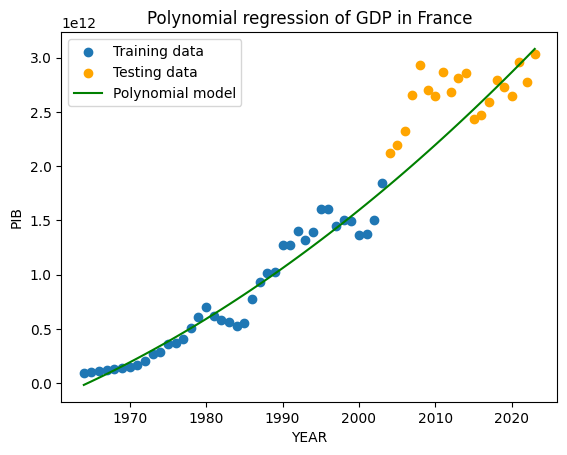

In [211]:
plt.scatter(x_train, y_train, label="Training data")
plt.scatter(x_test, y_test, label="Testing data", color="orange")
plt.plot(x, y_pred_full, color="green", label="Polynomial model")

plt.xlabel("YEAR")
plt.ylabel("PIB")
plt.title("Polynomial regression of GDP in France")
plt.legend()
plt.show()





*   evaluate performance


In [212]:
r2_poly = r2_score(y_test, y_pred_poly)
RMSE_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print("R² Polynomial regression =", r2_poly)
print("RMSE Polynomial regression =", RMSE_poly)


R² Polynomial regression = -1.5739470111715361
RMSE Polynomial regression = 385049469950.1466




*  Compare with linear regression




compare metrics


In [213]:
print("Linear Regression : R² =", r2_reg, "RMSE =", RMSE_reg)
print("Polynomial Regression : R² =", r2_poly, "RMSE =", RMSE_poly)
if (r2_reg>r2_poly) and (RMSE_reg<RMSE_poly):
  print("Linear Regression is better")
else:
  print("Polynomial Regression is better")

Linear Regression : R² = -4.185613550260971 RMSE = 546533519857.54266
Polynomial Regression : R² = -1.5739470111715361 RMSE = 385049469950.1466
Polynomial Regression is better


compare graphics

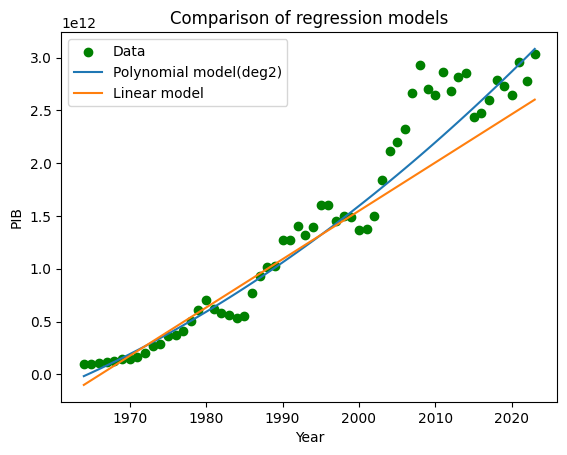

In [218]:
plt.scatter(x,y,label="Data",color="green")
plt.plot(x,y_pred_full,label="Polynomial model(deg2)")
plt.plot(x,y_predreg_all,label="Linear model")
plt.xlabel("Year")
plt.ylabel("PIB")
plt.title("Comparison of regression models")
plt.legend()
plt.show()






5.Exponential regression   


In [219]:
regr=linear_model.LinearRegression()
regr.fit(x_train,np.log(y_train))
print("a=",regr.coef_)
print("b=",regr.intercept_)


a= [0.07786985]
b= -127.40357889716768


In [220]:
y_pred_log = regr.predict(x_test)
y_pred_exp = np.exp(y_pred_log)

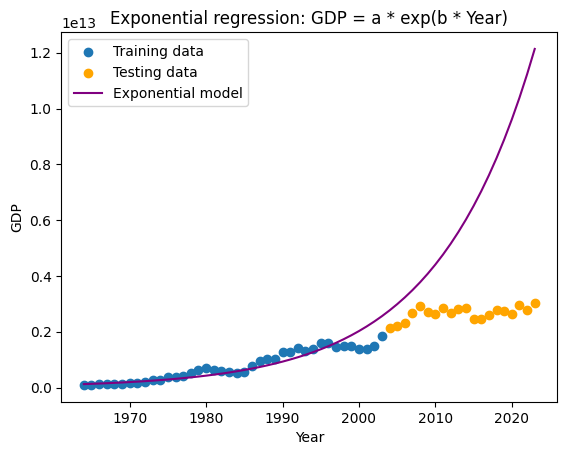

In [221]:
plt.scatter(x_train, y_train, label="Training data")
plt.scatter(x_test, y_test, label="Testing data", color="orange")
plt.plot(x, np.exp(regr.intercept_ + regr.coef_ * x), color="purple", label="Exponential model")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Exponential regression: GDP = a * exp(b * Year)")
plt.legend()
plt.show()


In [222]:
r2_exp = r2_score(y_test, y_pred_exp)
RMSE_exp = np.sqrt(mean_squared_error(y_test, y_pred_exp))

print("R² exponentiel model =", r2_exp)
print("RMSE exponentiel model =", RMSE_exp)

R² exponentiel model = -366.4763004188915
RMSE exponentiel model = 4600779257701.335


# Compare the three models


compare R² and RMSE:

In [223]:
print("Linear Regression : R² =", r2_reg, "RMSE =", RMSE_reg)
print("Polynomial Regression : R² =", r2_poly, "RMSE =", RMSE_poly)
print("Exponential Regression : R² =", r2_exp, "RMSE =", RMSE_exp)


Linear Regression : R² = -4.185613550260971 RMSE = 546533519857.54266
Polynomial Regression : R² = -1.5739470111715361 RMSE = 385049469950.1466
Exponential Regression : R² = -366.4763004188915 RMSE = 4600779257701.335


Text(0.5, 1.0, 'Comparison of regression models')

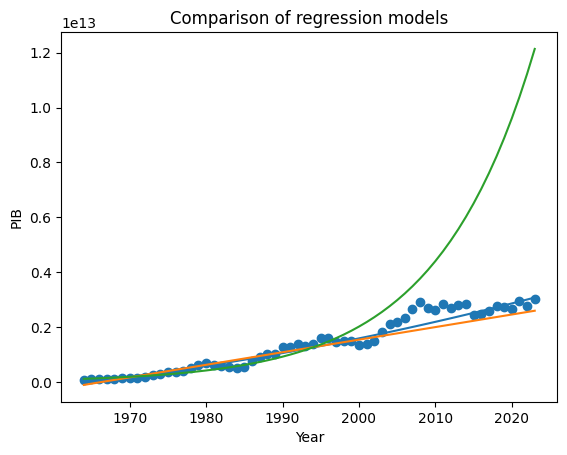

In [225]:
plt.scatter(x,y,label="Data")
plt.plot(x,y_pred_full,label="Polynomial model(deg2)")
plt.plot(x,y_predreg_all,label="Linear model")
plt.plot(x, np.exp(regr.intercept_ + regr.coef_ * x), label="Exponential model")
plt.xlabel("Year")
plt.ylabel("PIB")
plt.title("Comparison of regression models")

ADD new features data

Population

cleaning data


In [ ]:
#from google.colab import files
#uploaded = files.upload()


Saving population_france.xlsx to population_france (1).xlsx


In [226]:
df_population = pd.read_excel("population_france.xlsx")
df_population=df_population.drop(index=1)
population_row = df_population.iloc[0]
new_df = pd.DataFrame({
    'Year': df_population.columns,
    'Population':population_row.values
})
new_df=new_df.drop(index=[0,6])
new_df=new_df.reset_index(drop=True)
print(new_df.head(20))



    Year    Population
0   1960  47,412,964.0
1   1961  47,905,982.0
2   1962  48,389,516.0
3   1963  48,877,567.0
4   1964  49,401,492.0
5   1965  49,877,725.0
6   1966  50,311,637.0
7   1967  50,722,791.0
8   1968  51,112,980.0
9   1969  51,536,014.0
10  1970  52,007,169.0
11  1971  52,499,553.0
12  1972  52,962,356.0
13  1973  53,392,161.0
14  1974  53,746,571.0
15  1975  54,002,853.0
16  1976  54,232,383.0
17  1977  54,486,467.0
18  1978  54,734,030.0
19  1979  54,979,851.0


merge the two tables

In [227]:
new_df['Year'] = new_df['Year'].astype(str).str.strip().astype(int)

France_df = France_df.drop(columns=[col for col in France_df.columns if 'Population' in col], errors='ignore')
France_df = France_df.merge(new_df, on='Year', how='left')
print(France_df.head(20))



    Year         Value  Inflation  GDP growth      PIB_lag1      PIB_lag2  \
0   1964  9.400785e+10        3.2         6.4  8.475920e+10  7.560753e+10   
1   1965  1.015372e+11        2.7         4.8  9.400785e+10  8.475920e+10   
2   1966  1.100459e+11        2.6         5.2  1.015372e+11  9.400785e+10   
3   1967  1.189730e+11        2.8         4.9  1.100459e+11  1.015372e+11   
4   1968  1.297854e+11        4.5         4.5  1.189730e+11  1.100459e+11   
5   1969  1.419031e+11        6.0         7.1  1.297854e+11  1.189730e+11   
6   1970  1.484564e+11        5.3         6.2  1.419031e+11  1.297854e+11   
7   1971  1.659666e+11        5.4         5.3  1.484564e+11  1.419031e+11   
8   1972  2.034941e+11        6.1         4.5  1.659666e+11  1.484564e+11   
9   1973  2.644299e+11        7.4         6.6  2.034941e+11  1.659666e+11   
10  1974  2.855537e+11       13.6         4.7  2.644299e+11  2.034941e+11   
11  1975  3.608322e+11       11.7        -1.1  2.855537e+11  2.644299e+11   

Inflations

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving inflation.xlsx to inflation (1).xlsx


cleaning data

In [228]:
df_inflation = pd.read_excel("inflation.xlsx")
df_inflation=df_inflation.drop(index=1)
inflation_row = df_inflation.iloc[0]
new_df_inflation = pd.DataFrame({
    'Year': df_inflation.columns,
    'Inflation':inflation_row.values
})
new_df_inflation=new_df_inflation.drop(index=[0,11])
new_df_inflation=new_df_inflation.reset_index(drop=True)
print(new_df_inflation.head(20))

    Year Inflation
0   1960       4.1
1   1961       2.4
2   1962       5.3
3   1963       5.0
4   1964       3.2
5   1965       2.7
6   1966       2.6
7   1967       2.8
8   1968       4.5
9   1969       6.0
10  1970       5.3
11  1971       5.4
12  1972       6.1
13  1973       7.4
14  1974      13.6
15  1975      11.7
16  1976       9.6
17  1977       9.5
18  1978       9.3
19  1979      10.6


Merge the two data


In [229]:
new_df_inflation['Year'] = new_df_inflation['Year'].astype(str).str.strip().astype(int)
France_df = France_df.drop(columns=[col for col in France_df.columns if 'Inflation' in col], errors='ignore')
France_df = France_df.merge(new_df_inflation, on='Year', how='left')
print(France_df.head(20))

    Year         Value  GDP growth      PIB_lag1      PIB_lag2    Population  \
0   1964  9.400785e+10         6.4  8.475920e+10  7.560753e+10  49,401,492.0   
1   1965  1.015372e+11         4.8  9.400785e+10  8.475920e+10  49,877,725.0   
2   1966  1.100459e+11         5.2  1.015372e+11  9.400785e+10  50,311,637.0   
3   1967  1.189730e+11         4.9  1.100459e+11  1.015372e+11  50,722,791.0   
4   1968  1.297854e+11         4.5  1.189730e+11  1.100459e+11  51,112,980.0   
5   1969  1.419031e+11         7.1  1.297854e+11  1.189730e+11  51,536,014.0   
6   1970  1.484564e+11         6.2  1.419031e+11  1.297854e+11  52,007,169.0   
7   1971  1.659666e+11         5.3  1.484564e+11  1.419031e+11  52,499,553.0   
8   1972  2.034941e+11         4.5  1.659666e+11  1.484564e+11  52,962,356.0   
9   1973  2.644299e+11         6.6  2.034941e+11  1.659666e+11  53,392,161.0   
10  1974  2.855537e+11         4.7  2.644299e+11  2.034941e+11  53,746,571.0   
11  1975  3.608322e+11        -1.1  2.85

GDP growth (annual %)

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving GDP growth (annual %).xlsx to GDP growth (annual %) (1).xlsx


In [230]:
df_GDP_growth = pd.read_excel("GDP growth (annual %).xlsx")
df_GDP_growth.head()

,,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,France,..,4.8,6.9,6.2,6.4,4.8,5.2,4.9,4.5,...,1.1,0.9,2.1,1.6,2.0,-7.4,6.9,2.6,0.9,1.2
1,Created from: World Development Indicators\nSe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


clean data

In [231]:
df_GDP_growth=df_GDP_growth.drop(index=1)
GDP_growth_row = df_GDP_growth.iloc[0]
new_df_GDP_growth = pd.DataFrame({
    'Year': df_GDP_growth.columns,
    'GDP growth':GDP_growth_row.values
})
new_df_GDP_growth=new_df_GDP_growth.drop(index=[0,11])
new_df_GDP_growth=new_df_GDP_growth.reset_index(drop=True)
new_df_GDP_growth=new_df_GDP_growth.drop(index=0)
new_df_GDP_growth=new_df_GDP_growth.reset_index(drop=True)

print(new_df_GDP_growth.head(20))

    Year GDP growth
0   1961        4.8
1   1962        6.9
2   1963        6.2
3   1964        6.4
4   1965        4.8
5   1966        5.2
6   1967        4.9
7   1968        4.5
8   1969        7.1
9   1970        6.2
10  1971        5.3
11  1972        4.5
12  1973        6.6
13  1974        4.7
14  1975       -1.1
15  1976        4.4
16  1977        3.6
17  1978        3.9
18  1979        3.7
19  1980        1.7


Merge it

In [ ]:
new_df_GDP_growth['Year'] = new_df_GDP_growth['Year'].astype(str).str.strip().astype(int)
France_df = France_df.drop(columns=[col for col in France_df.columns if 'GDP growth' in col], errors='ignore')
France_df = France_df.merge(new_df_GDP_growth, on='Year', how='left')
print(France_df.head(20))

    Year         Value    Population Inflation GDP growth
0   1960  6.222548e+10  47,412,964.0       4.1        NaN
1   1961  6.746164e+10  47,905,982.0       2.4        4.8
2   1962  7.560753e+10  48,389,516.0       5.3        6.9
3   1963  8.475920e+10  48,877,567.0       5.0        6.2
4   1964  9.400785e+10  49,401,492.0       3.2        6.4
5   1965  1.015372e+11  49,877,725.0       2.7        4.8
6   1966  1.100459e+11  50,311,637.0       2.6        5.2
7   1967  1.189730e+11  50,722,791.0       2.8        4.9
8   1968  1.297854e+11  51,112,980.0       4.5        4.5
9   1969  1.419031e+11  51,536,014.0       6.0        7.1
10  1970  1.484564e+11  52,007,169.0       5.3        6.2
11  1971  1.659666e+11  52,499,553.0       5.4        5.3
12  1972  2.034941e+11  52,962,356.0       6.1        4.5
13  1973  2.644299e+11  53,392,161.0       7.4        6.6
14  1974  2.855537e+11  53,746,571.0      13.6        4.7
15  1975  3.608322e+11  54,002,853.0      11.7       -1.1
16  1976  3.72

In [235]:
France_df["Population"] = France_df["Population"].replace(",", "", regex=True).astype(float)
France_df["Inflation"] = pd.to_numeric(France_df["Inflation"], errors="coerce")
France_df["GDP growth"] = pd.to_numeric(France_df["GDP growth"], errors="coerce")
print(France_df.dtypes)

Year            int64
Value         float64
GDP growth    float64
PIB_lag1      float64
PIB_lag2      float64
Population    float64
Inflation     float64
dtype: object


Correlation

In [236]:
df_corr = France_df[["Value", "Population", "Inflation", "GDP growth"]]
correlation_matrix = df_corr.corr()
print(correlation_matrix)


               Value  Population  Inflation  GDP growth
Value       1.000000    0.976822  -0.617404   -0.492961
Population  0.976822    1.000000  -0.582198   -0.525028
Inflation  -0.617404   -0.582198   1.000000    0.202984
GDP growth -0.492961   -0.525028   0.202984    1.000000


Create a heatmap visualization

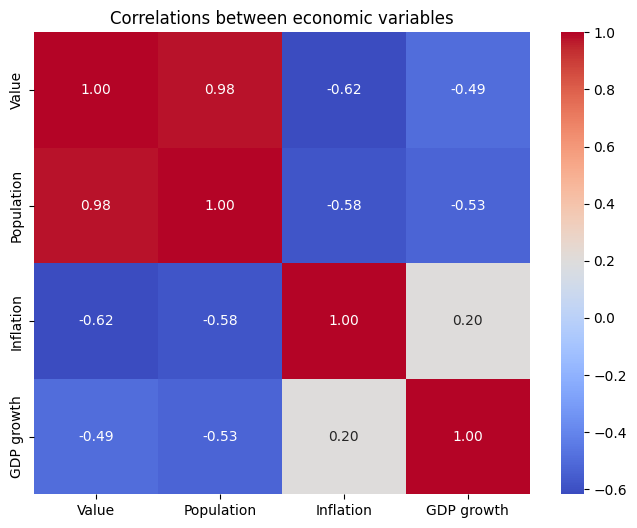

In [237]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlations between economic variables")
plt.show()

Multiple Linear Regression


In [238]:
France_df['PIB_lag1'] = France_df['Value'].shift(1)
France_df = France_df.dropna()

In [239]:
print(France_df.head())

   Year         Value  GDP growth      PIB_lag1      PIB_lag2  Population  \
2  1966  1.100459e+11         5.2  1.015372e+11  9.400785e+10  50311637.0   
3  1967  1.189730e+11         4.9  1.100459e+11  1.015372e+11  50722791.0   
4  1968  1.297854e+11         4.5  1.189730e+11  1.100459e+11  51112980.0   
5  1969  1.419031e+11         7.1  1.297854e+11  1.189730e+11  51536014.0   
6  1970  1.484564e+11         6.2  1.419031e+11  1.297854e+11  52007169.0   

   Inflation  
2        2.6  
3        2.8  
4        4.5  
5        6.0  
6        5.3  


Multiple Linear Regression



In [240]:
X = France_df[['Year', 'Population', 'Inflation', 'GDP growth', 'PIB_lag1']]
y = France_df['Value']
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_mlr = model.predict(X_test_scaled)
print("R² Score :", r2_score(y_test, y_pred_mlr))
RMSE_mr = np.sqrt(mean_squared_error(y_test, y_pred_mlr))
print("RMSE :", RMSE_mr)


R² Score : 0.27758442356876833
RMSE : 203990658370.22214


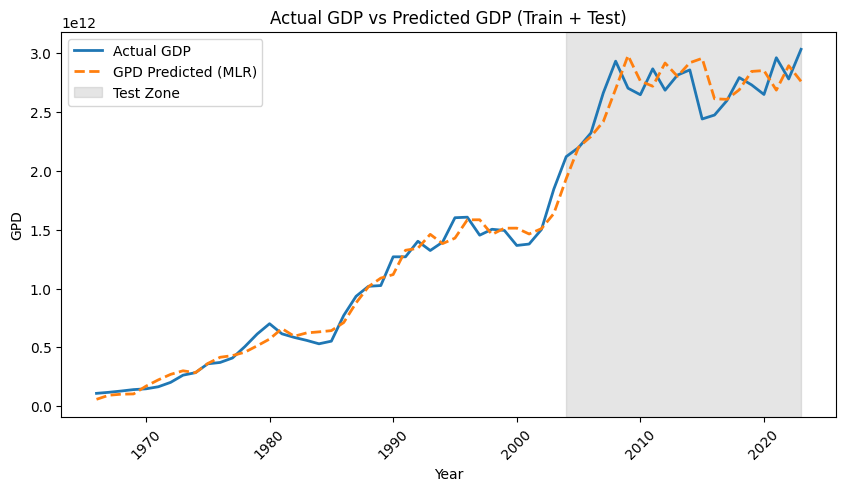

In [241]:
y_pred_all = model.predict(scaler.transform(X))

years = France_df['Year']

plt.figure(figsize=(10,5))
plt.plot(years, y, label="Actual GDP", linewidth=2)
plt.plot(years, y_pred_all, label="GPD Predicted (MLR)", linestyle="--", linewidth=2)

plt.axvspan(years.iloc[-len(y_test)], years.iloc[-1], color='grey', alpha=0.2, label="Test Zone")

plt.title("Actual GDP vs Predicted GDP (Train + Test)")
plt.xlabel("Year")
plt.ylabel("GPD")
plt.legend()
plt.xticks(rotation=45)
plt.show()